In [1]:
import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 72)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import LinearRegression

In [2]:
np.random.seed(100)

dims = np.power(2, 7 + np.arange(8))
data = dict()
degree = 0
nknots = 10
strue  = 0.1
knots  = np.linspace(0, 1, nknots+2)[1:-1]

for i, n in enumerate(dims):
    x = np.linspace(0, 1, n)
    data[i] = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                    signal = "normal", seed = 100,
                    include_intercept = False)

128
256
512
1024
2048
4096
8192
16384


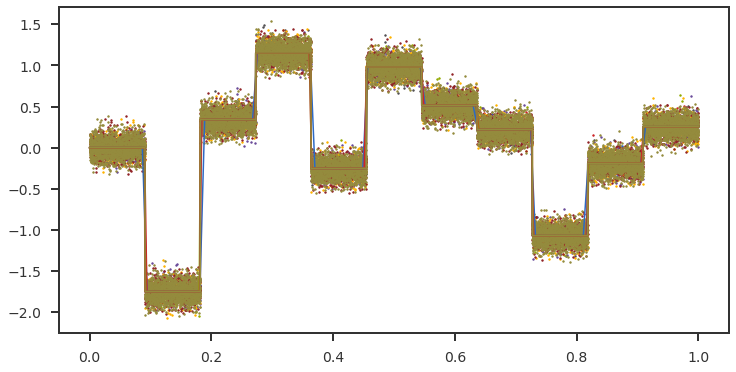

In [3]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

for i, n in enumerate(dims):
    print(data[i].y.shape[0])
    ax1.scatter(data[i].x, data[i].y, s = 2)
    ax1.plot(data[i].x, data[i].ytrue)
plt.show()

In [4]:
prior = toy_priors.get_ash_scaled(k = 20, sparsity = 0.9, skbase = 20)

In [5]:
itrtime = dict()
gv = dict()

for i, n in enumerate(dims):
    gv[i] = LinearRegression(obj = 'reparametrize', maxiter = 1000)
    gv[i].fit(data[i].H, data[i].y, prior)
    itrtime[i] = gv[i]._res.optim_time / gv[i].nfev
    print (n, itrtime[i])

128 0.0014240474309213165
256 0.002491336459503299
512 0.0028598777740355954
1024 0.005424035184177352
2048 0.012097295330858779
4096 0.03230609182150525
8192 0.0938960136088971
16384 0.2888569818352753


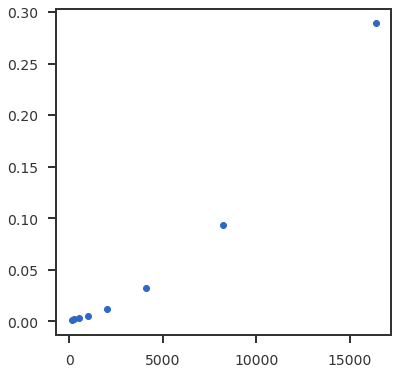

In [10]:
fig = plt.figure(figsize = (6, 6))
ax1 = fig.add_subplot(111)

yvals = np.array([itrtime[i] for i, n in enumerate(dims)])
ax1.scatter(dims, yvals)
plt.show()

In [8]:
np.log2(dims)

array([ 7.,  8.,  9., 10., 11., 12., 13., 14.])